In [2]:
import math, cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy import integrate
import matplotlib as mpl
from scipy import interpolate
import time, imageio
import glob, os
from ABM_package import *

from PDEFind_class_online import PDE_Findclass
from model_selection_IP3 import ODE_sim,learned_RHS_ODE
from PDE_FIND3 import Lasso, print_pde

In [4]:
rp = 1.0
rd = rp/4.0
rm = 2.0

A_out,t_out,plot_list = BDM_ABM(rp,rd,rm,T_end=10.0)

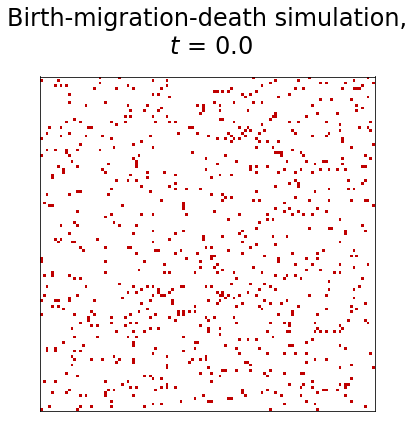

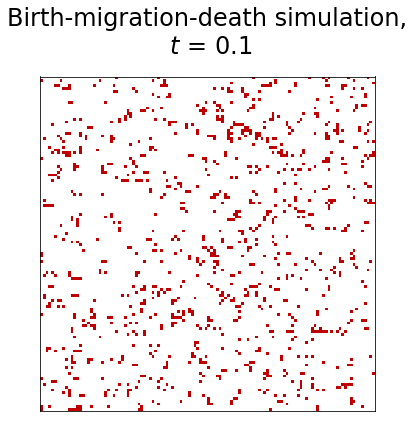

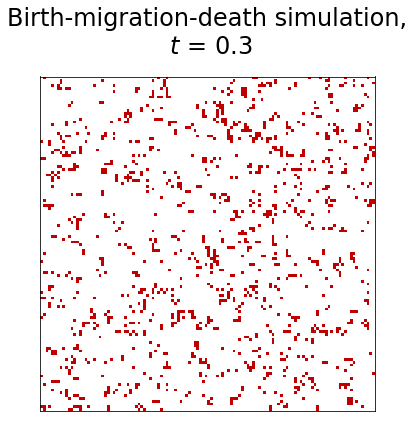

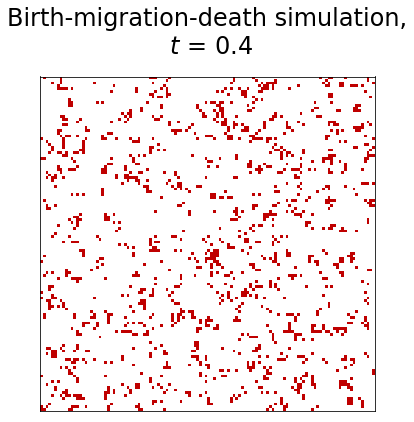

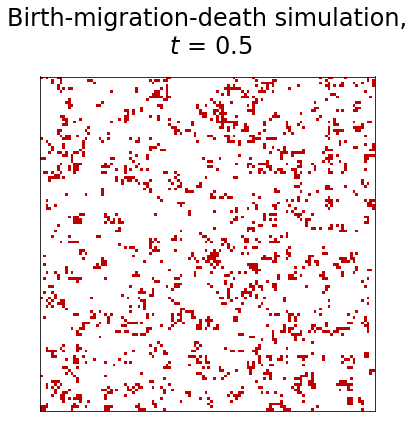

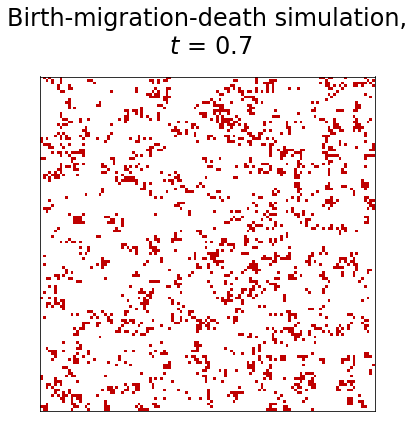

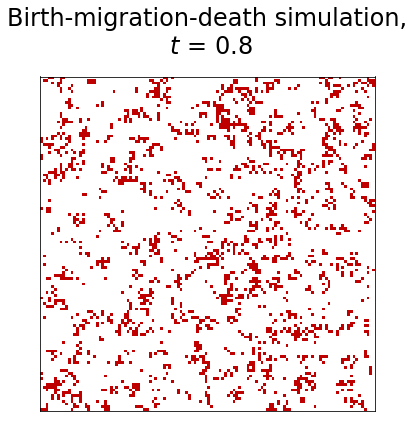

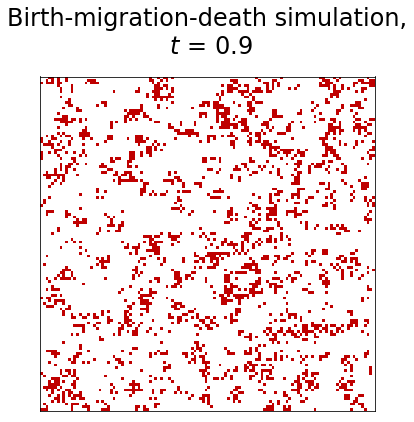

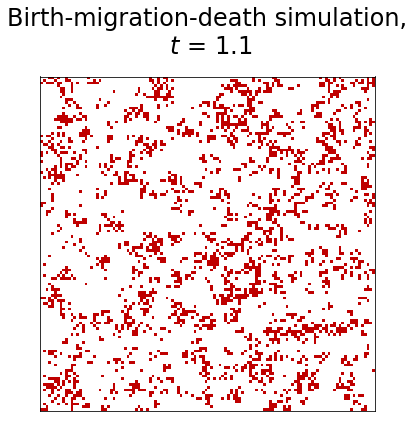

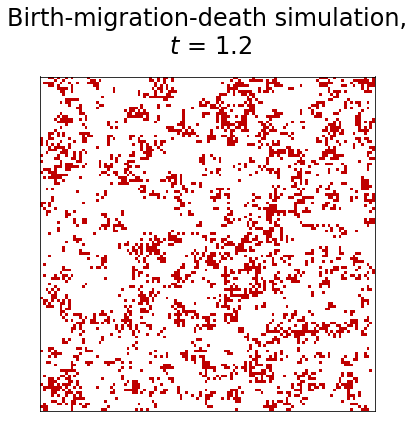

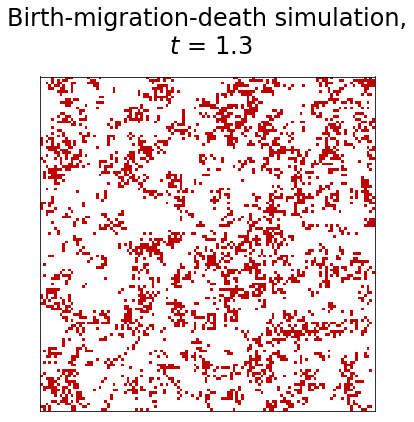

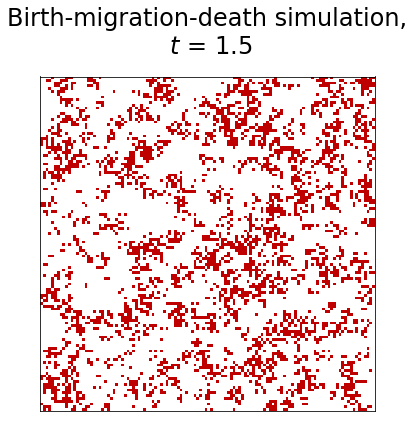

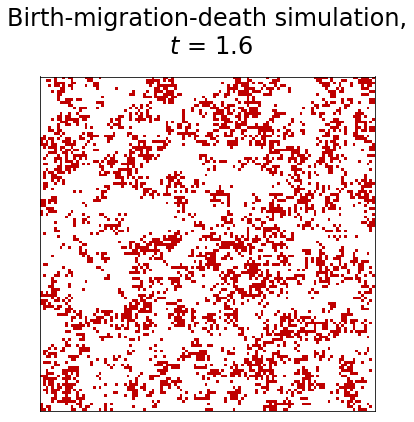

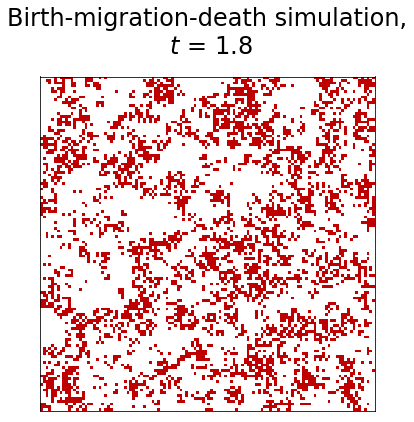

In [34]:
plot_ind = [2,7,15]

cmaplist = [(1.0,1.0,1.0,1.0),(.75,0,0,1.0)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, N = 2)

font = {'size'   : 20}
plt.rc('font', **font)

r = .975*(rp-rd)
K = r/rp
c0 = 0.05
logist = K*c0*(np.e**(r*t_out))/(K + c0*(np.e**(r*t_out)-1))

images = []

for i in np.arange(14):
    
    fig = plt.figure(figsize=(6,7))

    '''ax = fig.add_subplot(1,2,2,adjustable='box')

    ax.plot(t_out[:i*2]*(rp-rd),A_out[:i*2]/plot_list[0].size,'b-',label="ABM output")
    ax.plot(t_out*(rp-rd),logist,"k--",label = "Mean-field model")

    plt.legend()
    
    ax.set_xlim(0,t_out[-1]*(rp-rd))
    ax.set_ylim(0,1.1*K)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("DE model, ABM output")'''

    ax = fig.add_subplot(1,1,1,adjustable='box')

    ax.matshow(plot_list[i+1],cmap=cmap,vmin=0,vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Birth-migration-death simulation,\n $t$ = "+str(round(t_out[i],1)))

    filename = "figures/gif_"+f"{i:02}"+".png"
    plt.savefig(filename,dvips=500)
    #images.append(imageio.imread(filename))
    images.append("gif_"+f"{i:02}"+".png")
    
#imageio.mimsave('figures/BDM1.gif', images,fps = 3)

frame = cv2.imread(os.path.join("figures", images[0]))
height, width, layers = frame.shape

for file in glob.glob('figures/job_talk_intro.avi'):
    os.remove(file)

video = cv2.VideoWriter('figures/job_talk_intro.avi', 0, fps=2,frameSize = (width,height))

for image in images:
    video.write(cv2.imread(os.path.join("figures", image)))

cv2.destroyAllWindows()
video.release()

for file in glob.glob("figures/*.png"):
    os.remove(file)

In [7]:
os.path.join("figures", images[0])

'figures/gif_00'

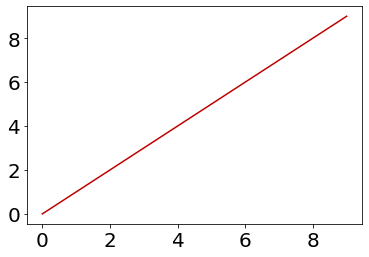

In [29]:
plt.plot(np.arange(10),color=[.75,0,0])

In [5]:
rp = 0.25
rd = 0.125
rm = 1.0

A_out,t_out,plot_list = BDM_ABM(rp,rd,rm,T_end=15.0)

Learned equation from regression is:
dC/dt = 0.11322C    - 0.36959C^2    + 0.21297C^3    + 0.13146C^4   


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


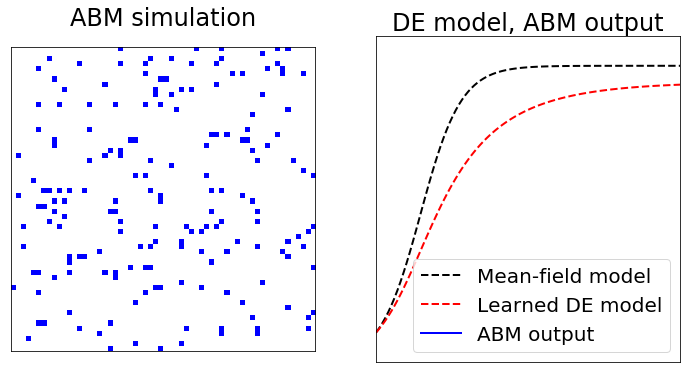

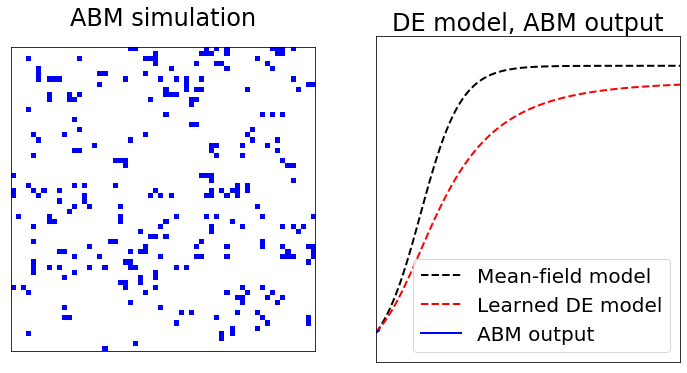

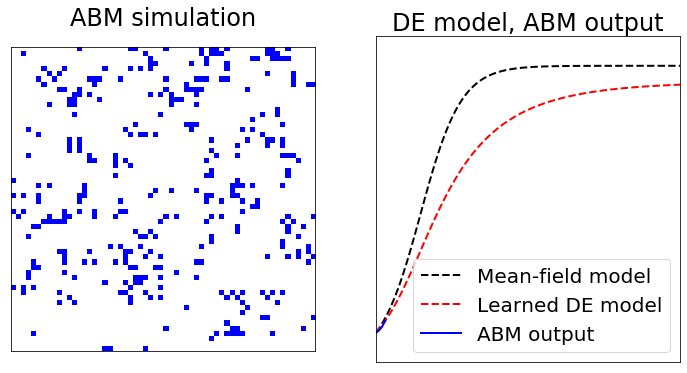

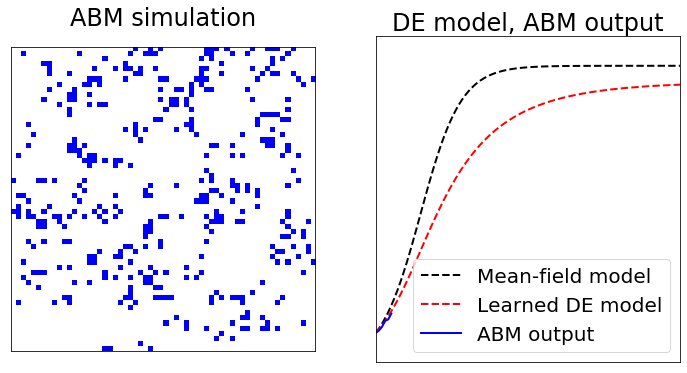

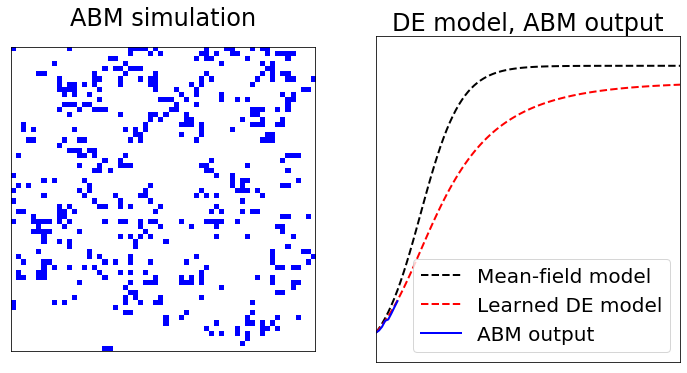

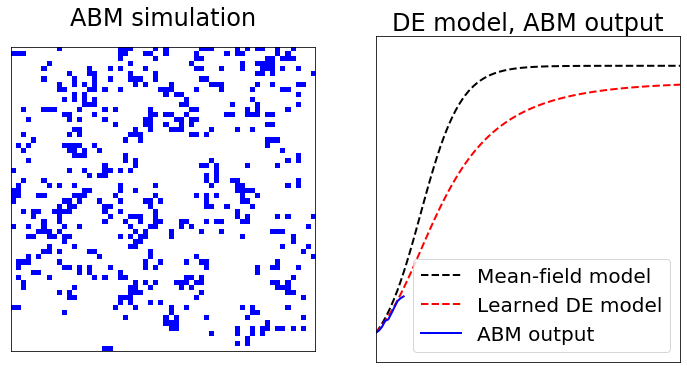

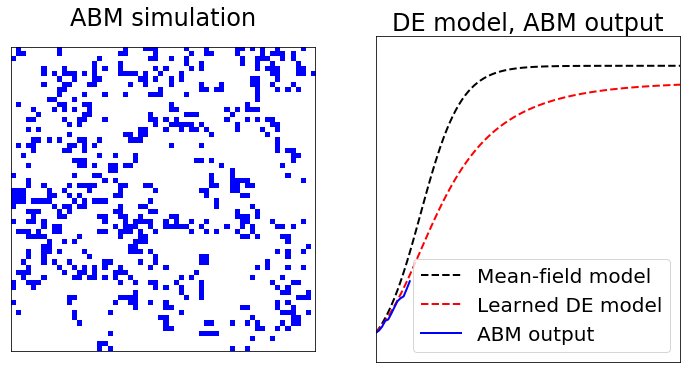

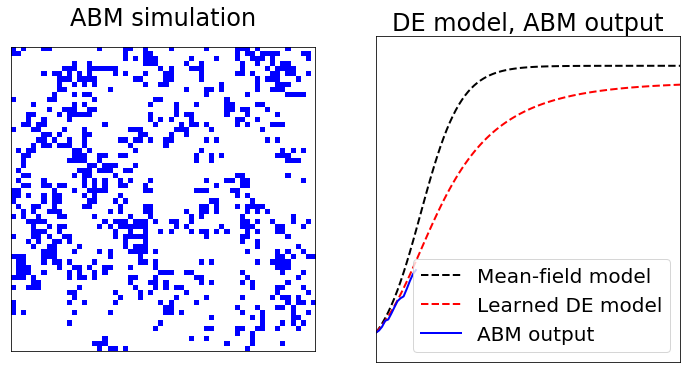

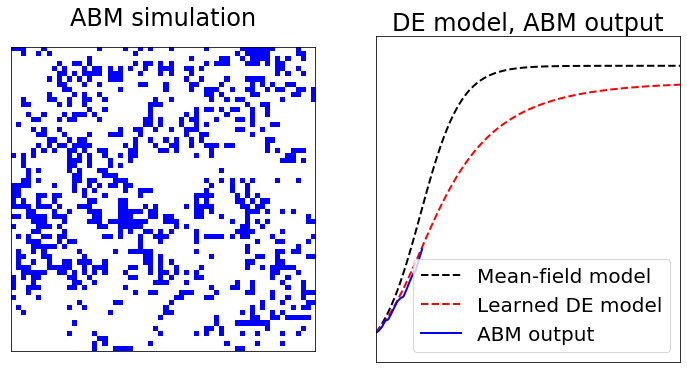

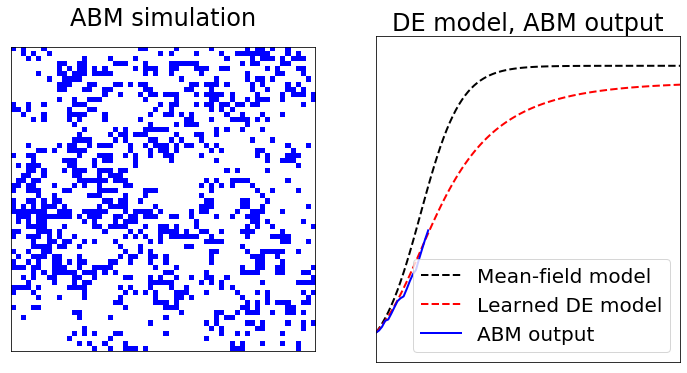

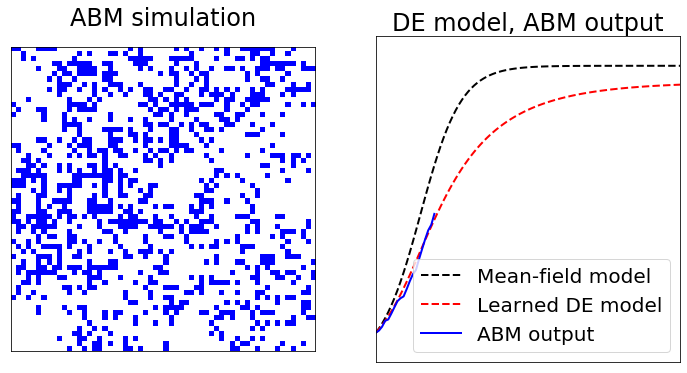

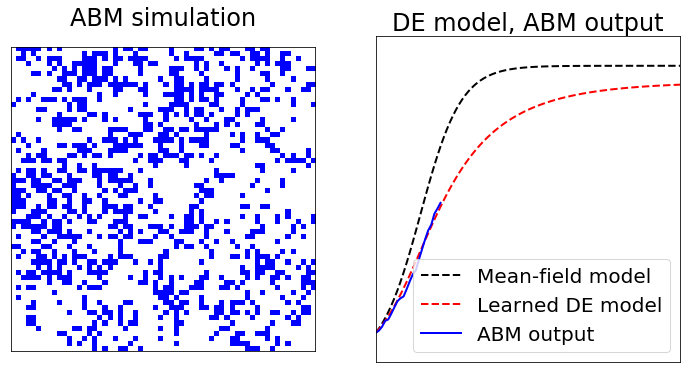

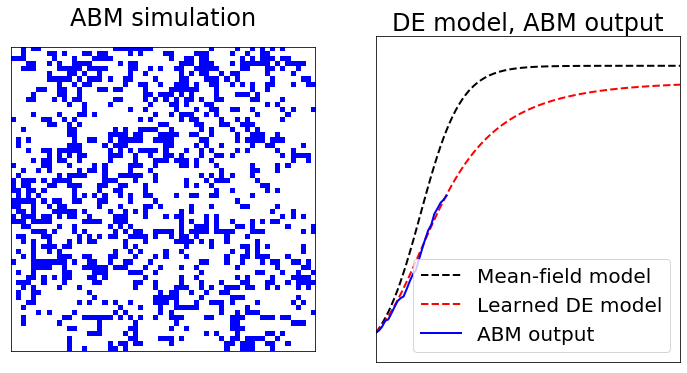

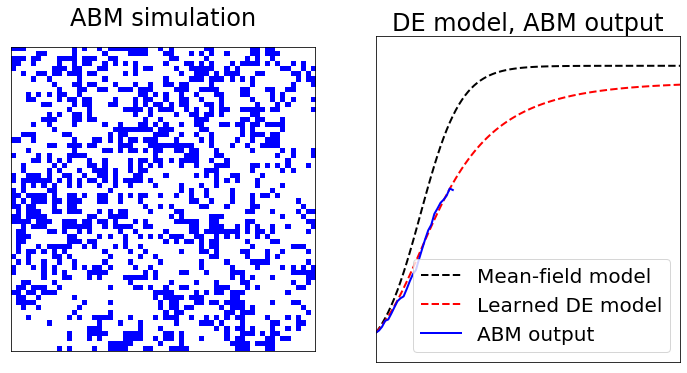

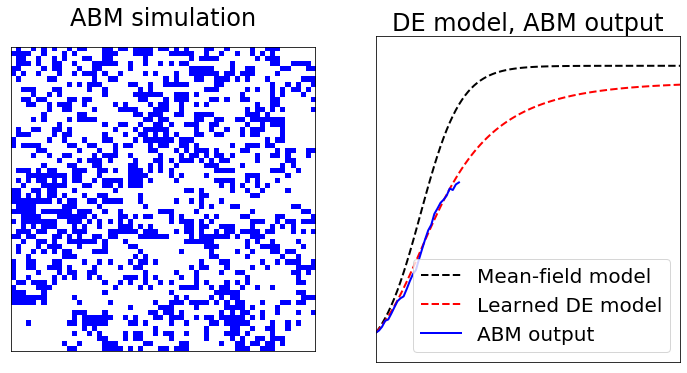

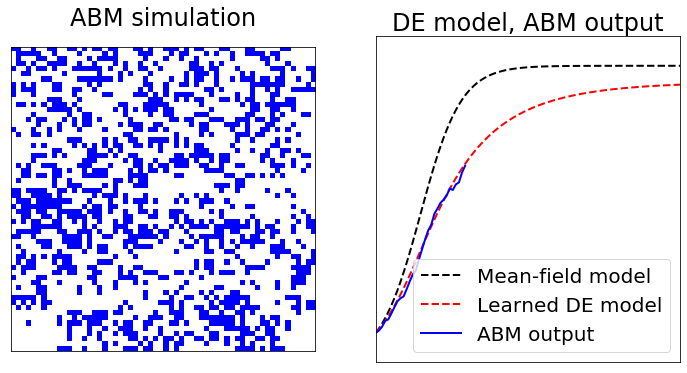

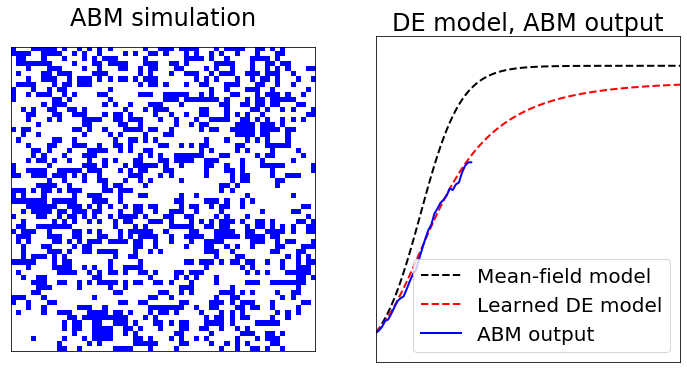

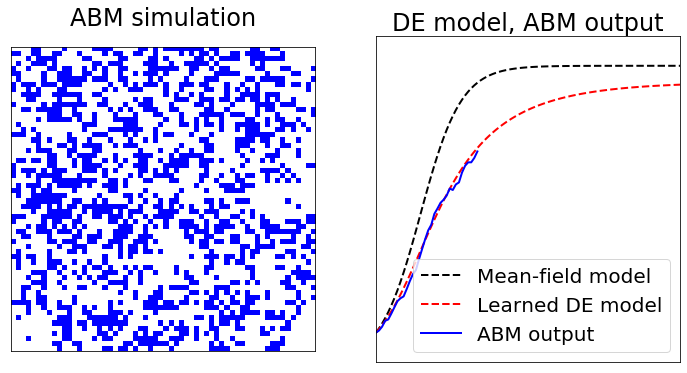

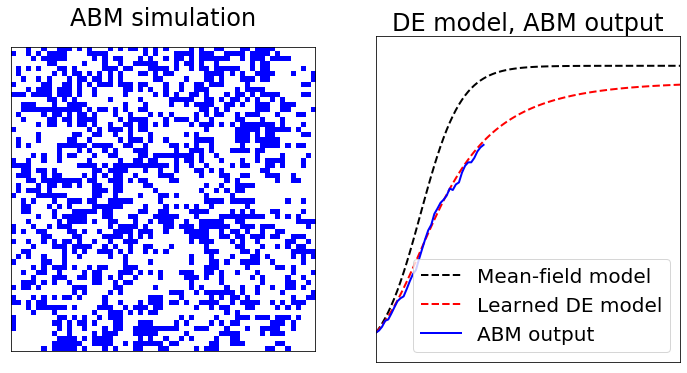

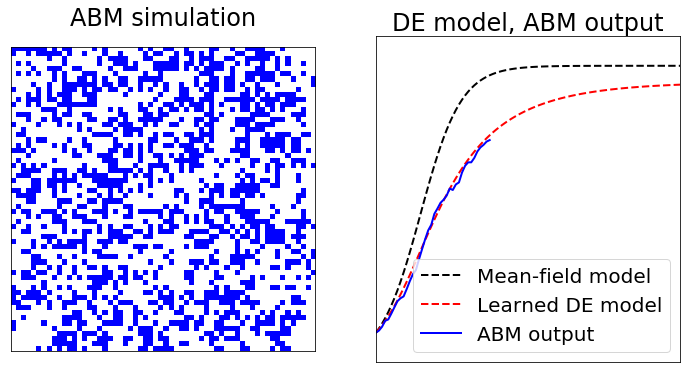

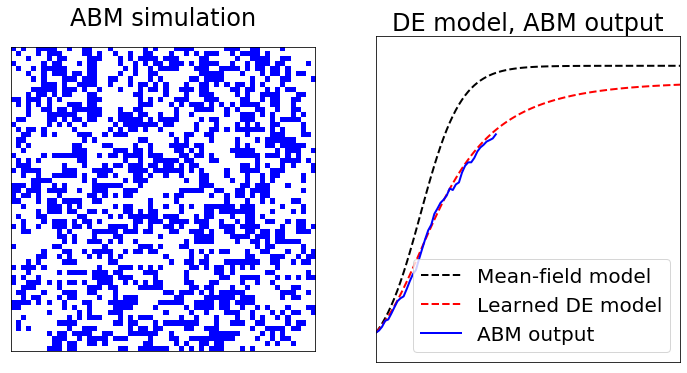

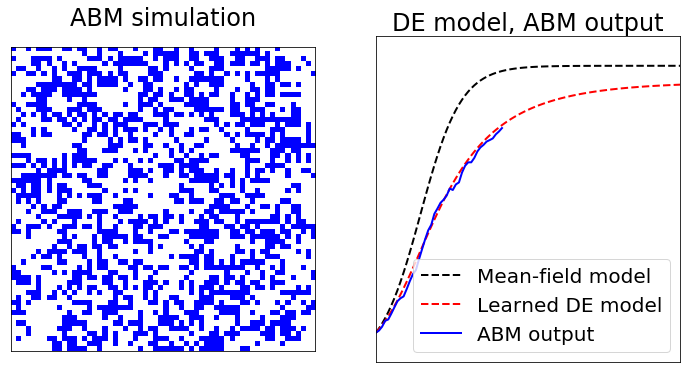

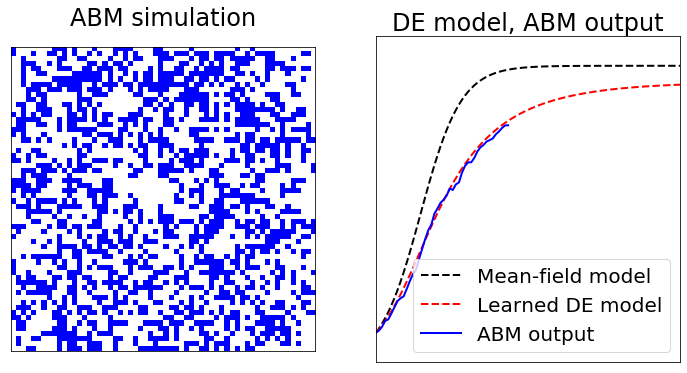

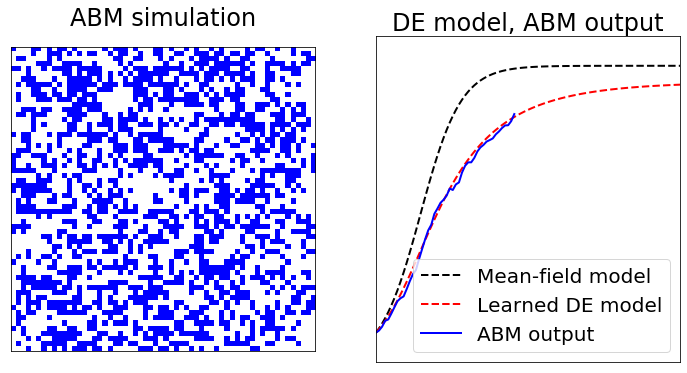

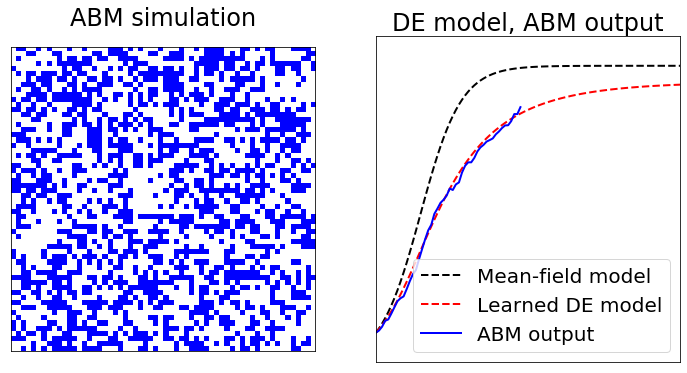

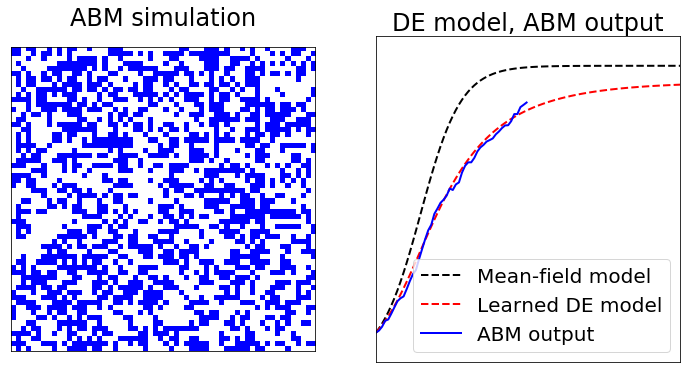

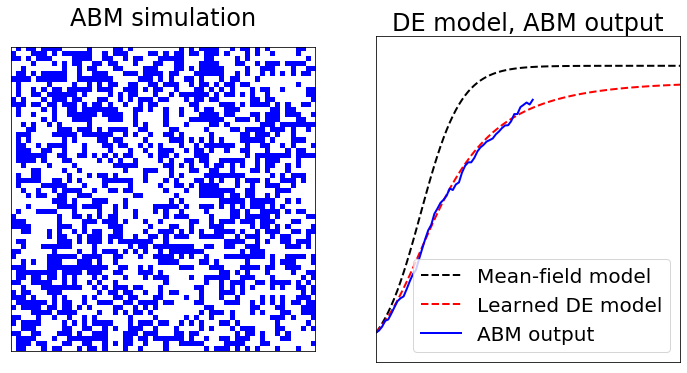

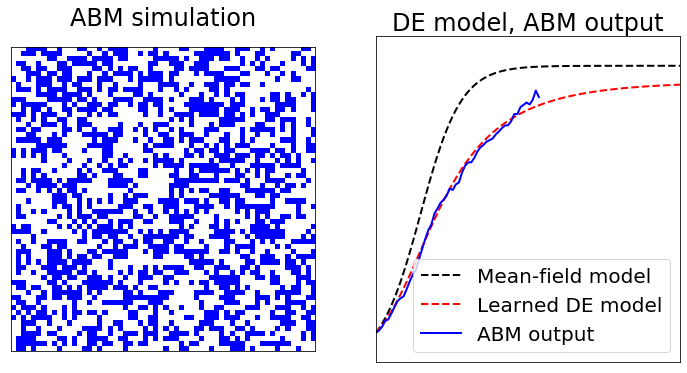

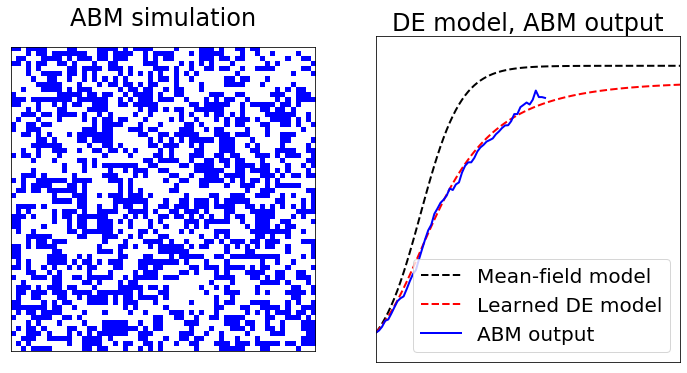

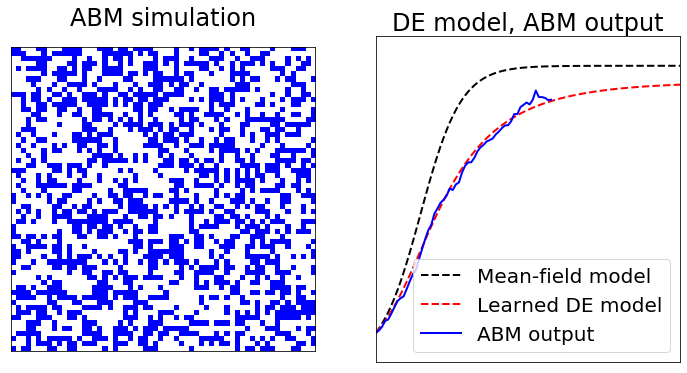

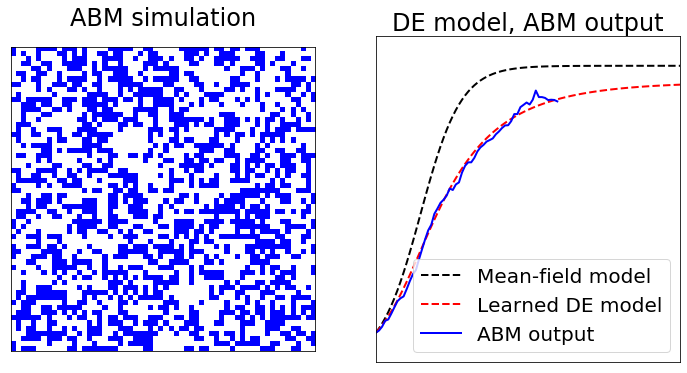

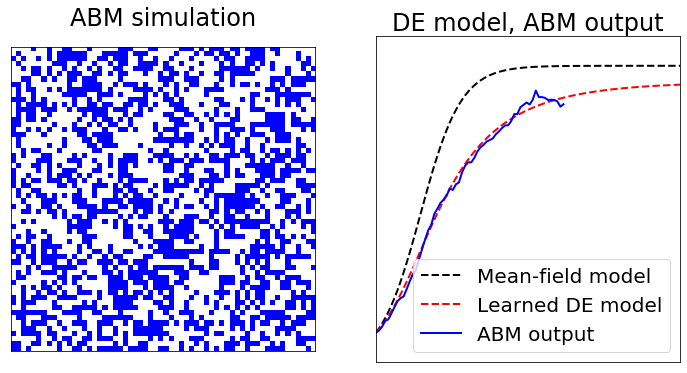

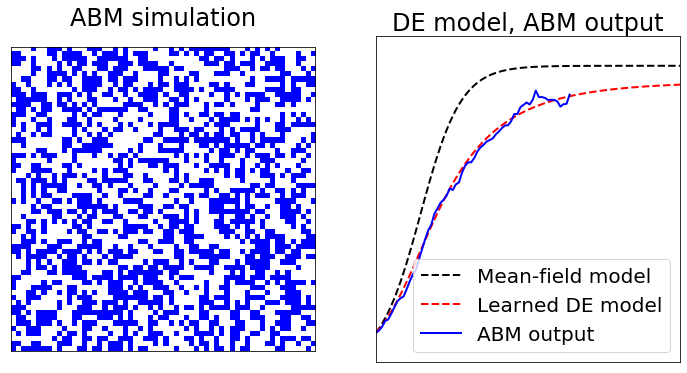

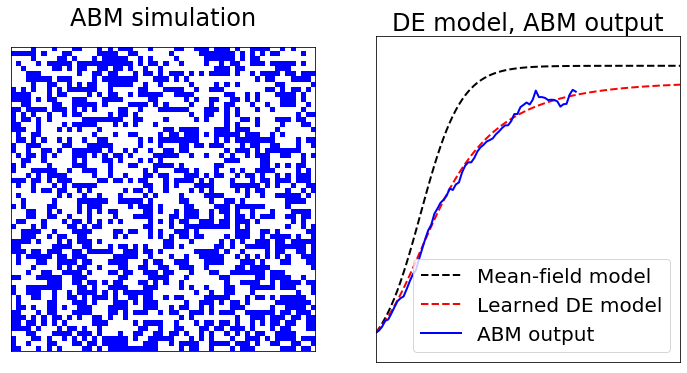

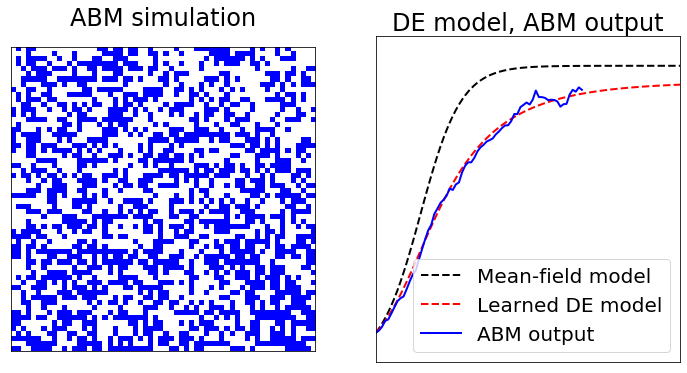

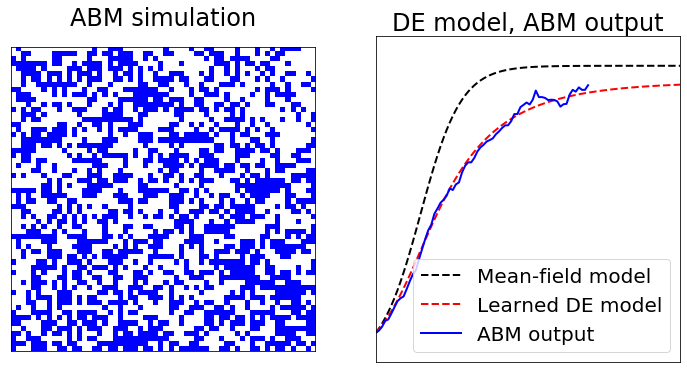

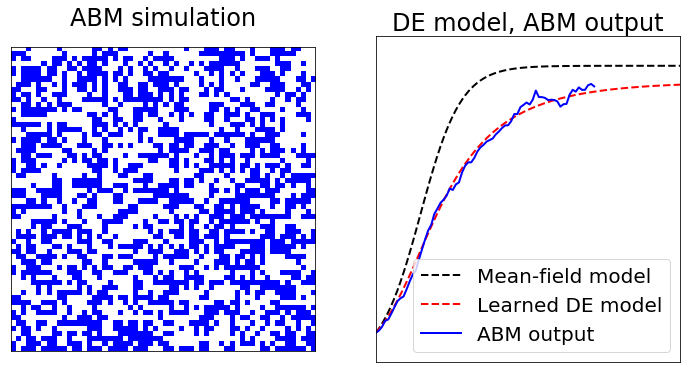

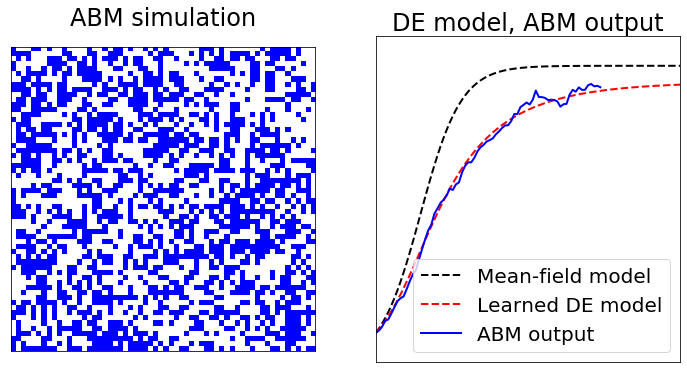

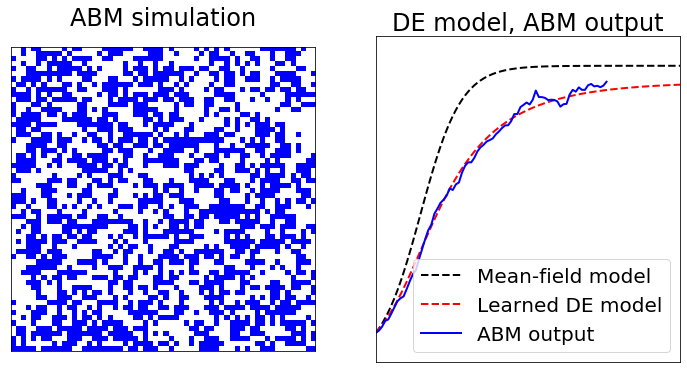

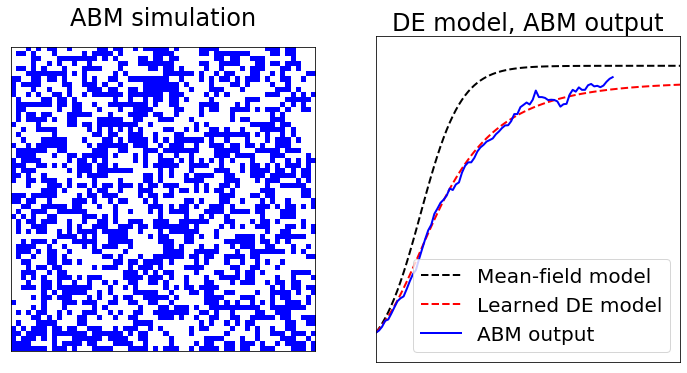

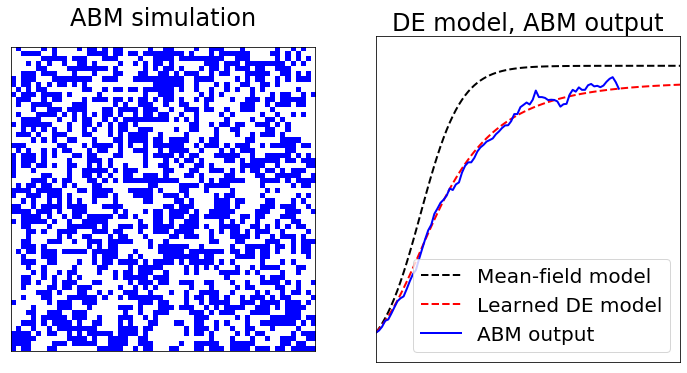

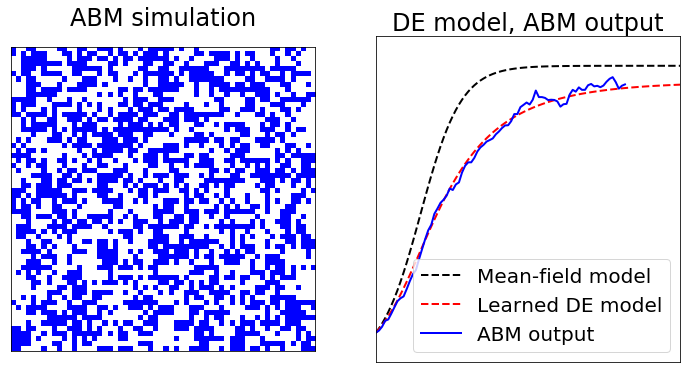

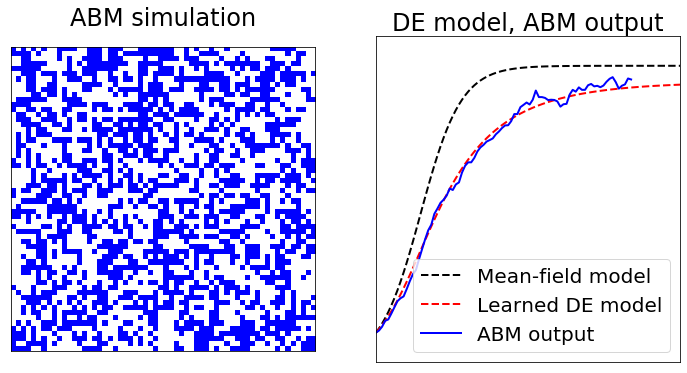

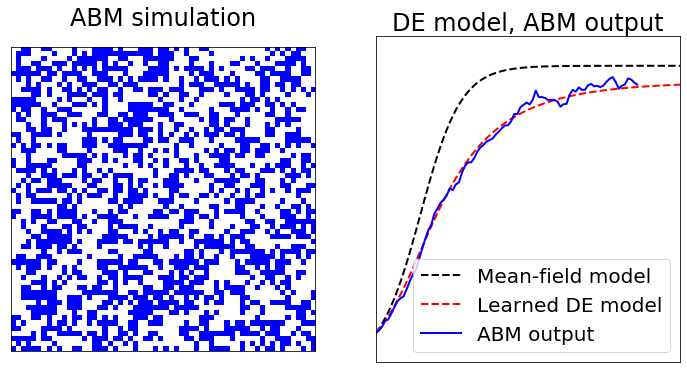

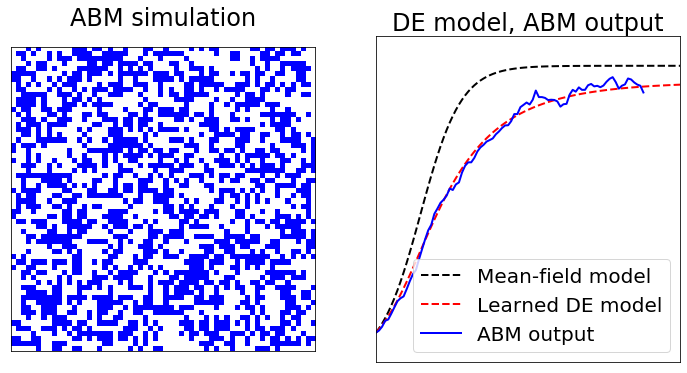

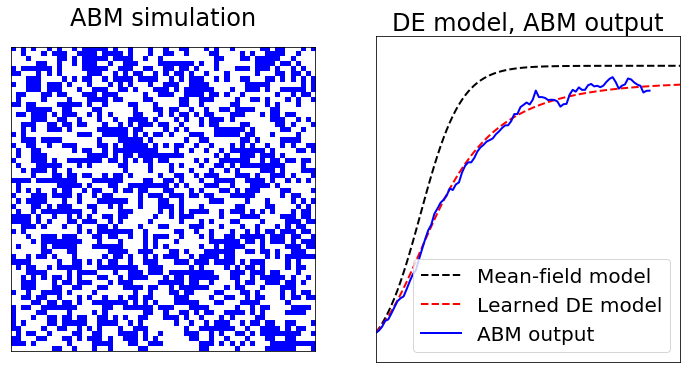

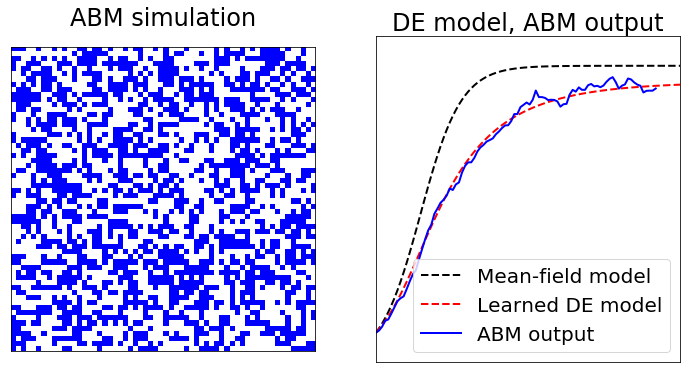

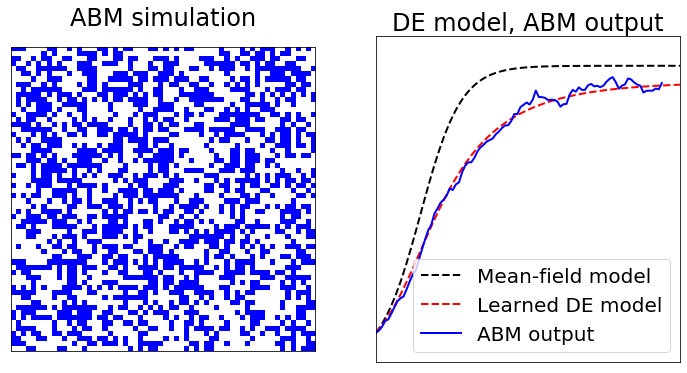

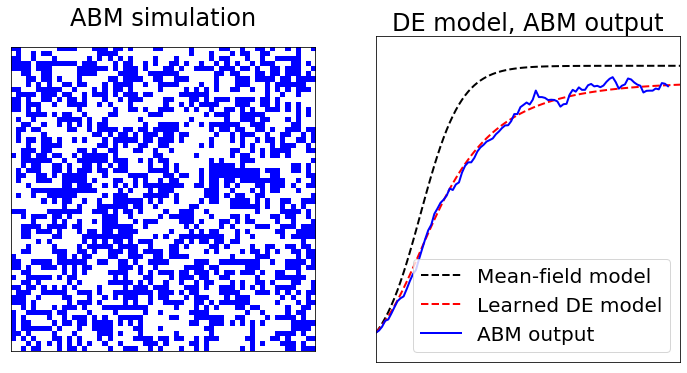

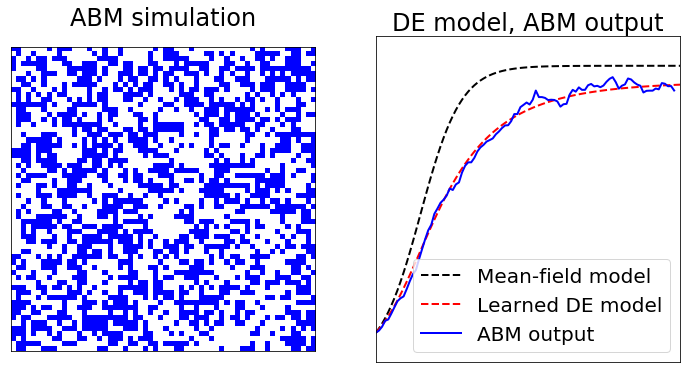

In [9]:
def finite_diff(C,dt):
	dCdt = np.zeros(C.shape)
	dCdt[1:-1] = (C[2:] - C[:-2])/(2*dt)
	dCdt[0] = (C[1] - C[0])/dt
	dCdt[-1] = (C[-1] - C[-2])/dt
	return dCdt

C = np.atleast_2d(A_out/plot_list[0].size).T
dcdt = finite_diff(C,t_out[2] - t_out[1])

theta = np.hstack([C,C**2,C**3,C**4])

xi = Lasso(theta,dcdt,9e-3)

print("Learned equation from regression is:")
print(print_pde(xi,["C","C^2","C^3","C^4"],n=5,ut="dC/dt"))

RHS = learned_RHS_ODE
u_sim = ODE_sim(xi,RHS,t_out,np.array(C[0]),description=["C^1","C^2","C^3","C^4"],deg=4)

plot_ind = [2,7,15]

cmaplist = [(1.0,1.0,1.0,1.0),(0.0,0.0,1.0,1.0)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, N = 2)

font = {'size'   : 20}
plt.rc('font', **font)

r = rp-rd
K = r/rp
c0 = 0.05
logist = K*c0*(np.e**(r*t_out))/(K + c0*(np.e**(r*t_out)-1))

images = []

for i in np.arange(50):
    
    fig = plt.figure(figsize=(12,6))

    ax = fig.add_subplot(1,2,2,adjustable='box')
    
    ax.plot(t_out*(rp-rd),logist,"k--",linewidth=2,label = "Mean-field model")
    ax.plot(t_out*(rp-rd),u_sim[0,:],"r--",linewidth=2,label = "Learned DE model")
    ax.plot(t_out[:i*2]*(rp-rd),A_out[:i*2]/plot_list[0].size,"b-",linewidth=2,label="ABM output")
    
    plt.legend()
    
    ax.set_xlim(0,t_out[-1]*(rp-rd))
    ax.set_ylim(0,1.1*K)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("DE model, ABM output")

    ax = fig.add_subplot(1,2,1,adjustable='box')

    ax.matshow(plot_list[i+1],cmap=cmap,vmin=0,vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("ABM simulation")

    filename = "figures/gif_"+f"{i:02}"+".png"
    plt.savefig(filename,dvips=500)
    images.append(imageio.imread(filename))
    
imageio.mimsave('figures/BDM2.gif', images,fps = 3)

for file in glob.glob("figures/*.png"):
    os.remove(file)


